In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import xarray as xr
import os
import math as m

In [515]:
directory = "E:/Climate/final/"
file_list = np.array ([file for file in os.listdir(directory) if file.endswith('.nc')])
# file_list

In [516]:
# Aggregating files
file_dict = {}
model_list = []
for file in file_list:
    dataset = xr.open_dataset(os.path.join(directory, file), decode_times=False)
    file_dict[file] = dataset
    if 'ERA5_t2m_1_2022_C' in file:
         continue
    model_list.append(file)
# model_list
# dict[file_list[0]]

In [635]:
# CORRELATIONS
timcor = {}
timmean = {}
for file in model_list:
    if 'timcor' in file:
        timcor[file] = file_dict[file]
    if 'timmean' in file:
        timmean[file] = file_dict[file]['tas'][0][0][0]

# timcor['timcor_tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc']

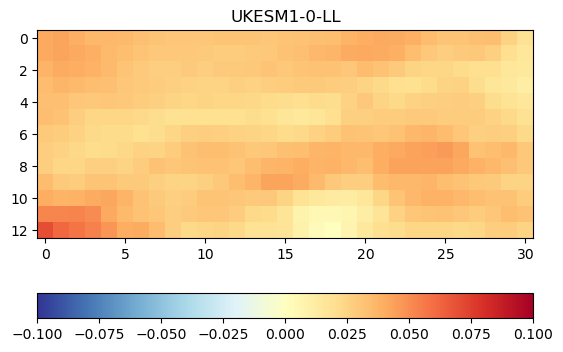

In [531]:
# Visualizing one timcor
file = 'timcor_tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc'
plt.title(file.split('_')[3], fontsize=12)
plt.imshow(timcor[file][::-1],  vmin=-0.1, vmax=0.1, cmap='RdYlBu_r')

plt.colorbar(orientation='horizontal')
# plt.savefig("0.png")

In [749]:
def data_disp (keyword, stopword, data_dict, name_value, timestep, columns, n_lat, n_lon, pos_in_filename, title,
               scale_range, savefig, fig_name):

    #### Displayig 25 timcors (data_dict)
    if keyword == '' and stopword == '':
        data_list = np.array([file for file in data_dict.keys()])
    elif stopword == '':
        data_list = np.array([file for file in data_dict.keys() if keyword in file])
    else:
        data_list = np.array([file for file in data_dict.keys() if (keyword in file and not stopword in file)])
    n_subs = len(data_list)
    fig, ax = plt.subplots(n_subs//columns, columns, figsize=(11.7, 8.3), layout='constrained')
      
    fig.suptitle (title, fontsize=14)

    for i in range(n_subs):
        row = i // columns
        column = i % columns

        name = data_list[i].split('_')[pos_in_filename]
        array = data_dict[data_list[i]][name_value][timestep]
        
        if scale_range == 0:
            plotted = ax[row, column].imshow(array[::-1], cmap='RdYlBu_r')
        else:
            plotted = ax[row, column].imshow(array[::-1],  vmin=-scale_range, vmax=scale_range, cmap='RdYlBu_r')
        ax[row, column].set_title(name, fontsize=10)

        if n_lat*n_lon != 0:
            # Counting how to place ticks
            longitudes = np.array (array['lon'], dtype='int')
            latitudes = np.array (array['lat'][0:180]+0.5, dtype='int')
            lon_step = len(longitudes)//(n_lon-1)
            lat_step = m.ceil(len(latitudes)/(n_lat))

            ax[row, column].tick_params(length=2, labelsize=6)
            ax[row, column].set_xticks(np.arange(0, len(longitudes), lon_step))
            ax[row, column].set_xticklabels(list(str(lon) + 'E' for lon in longitudes[::lon_step]))
            ax[row, column].set_yticks(np.arange(0, len(latitudes), lat_step))
            ax[row, column].set_yticklabels(list(str(lat) + 'N' for lat in latitudes[-1::-lat_step]))
            ax[row, column].grid(color='black', linestyle='dashed', linewidth=0.5, alpha=0.2)

    cbar = fig.colorbar(plotted, ax=ax, location='bottom', anchor=(0.5, 0), shrink=0.4, extend='both', orientation='horizontal')

    plt.show()
    if (savefig):    fig.savefig(fig_name)

In [736]:
# Open 6 model outputs from my directory
i = 0
for file in file_dict.keys():
    if ('_remap' in file and not 'C' in file):
        print (file)
        i+=1
i

tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_185001-210012_r360x180_remap.nc
tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_185001-210012_r360x180_remap.nc
tas_Amon_FIO-ESM-2-0_ssp585_r1i1p1f1_185001-210012_r360x180_remap.nc
tas_Amon_IITM-ESM_ssp585_r1i1p1f1_185001-210012_r360x180_remap.nc
tas_Amon_KIOST-ESM_ssp585_r1i1p1f1_185001-210012_r360x180_remap.nc
tas_Amon_GISS-E2-1-G_ssp585_r1i1p1f2_185001-210012_r360x180_remap.nc


6

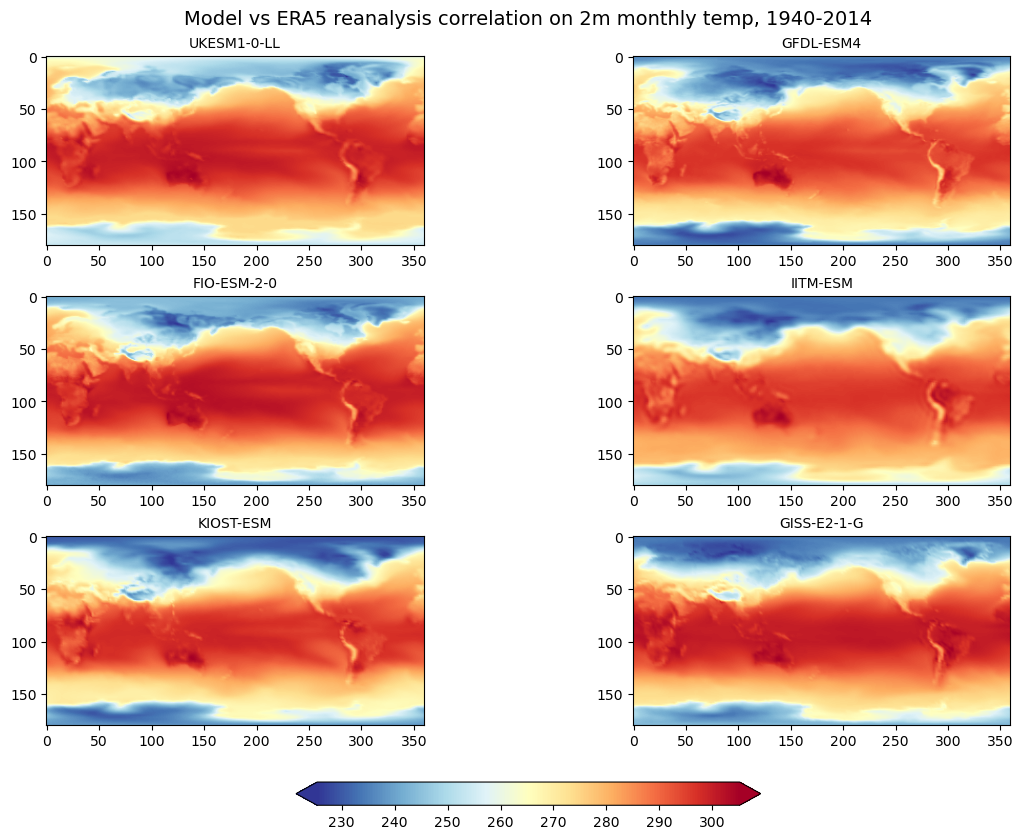

In [752]:
data_disp ('_remap', 'C', file_dict, 'tas', 0, 2, 0, 0, 2, t_timcor, 0, False, "example_fig.png")

In [744]:
# Open all timcors from directory
i = 0
for file in file_dict.keys():
    if ('timcor' in file):
        print (file)
        i+=1
i

timcor_tas_Amon_IITM-ESM_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
timcor_tas_Amon_CAMS-CSM1-0_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
timcor_tas_Amon_CESM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
timcor_tas_Amon_KIOST-ESM_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
timcor_tas_Amon_CanESM5-CanOE_ssp585_r1i1p2f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
timcor_tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
timcor_tas_Amon_CNRM-ESM2-1_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
timcor_tas_Amon_GISS-E2-1-G_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
timcor_tas_Amon_CanESM5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box.nc
timcor_tas_Amon_FIO-ESM-2-0_ssp585_r1i1p1f1_185001-210012_r360x180_rem

25

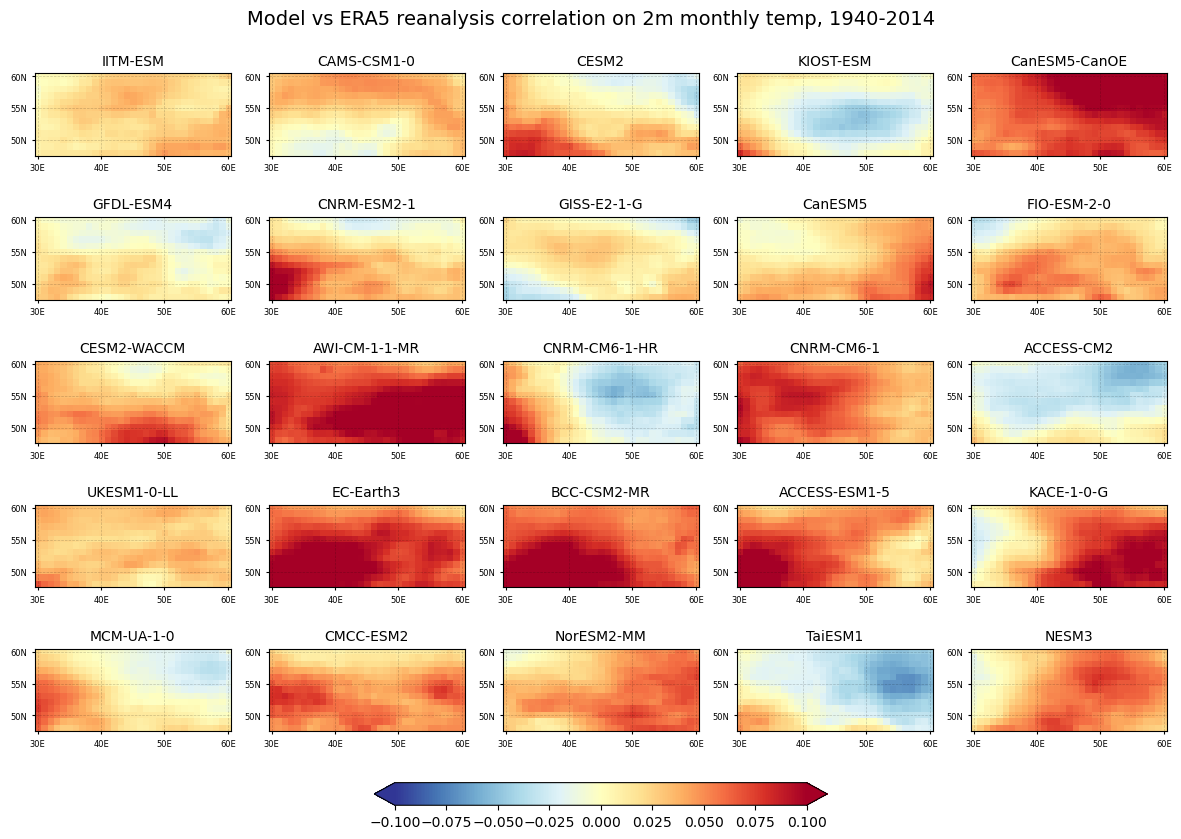

In [750]:
data_disp ('timcor', '', file_dict, 'tas', 0, 5, 3, 4, 3, t_timcor, 0.1, False, "example_fig.png")